# Problem Statement:-
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table. Some relevant columns in the dataset:

• Date - The date of the observation

• AveragePrice - the average price of a single avocado

• type - conventional or organic

• year - the year

• Region - the city or region of the observation

• Total Volume - Total number of avocados sold

• 4046 - Total number of avocados with PLU 4046 sold

• 4225 - Total number of avocados with PLU 4225 sold

• 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label The dataset can be seen in two angles to find the region and find the average price . Task: One of Classification and other of Regression Do both tasks in the same .ipynb file and submit at single file.

Dataset Link- • https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\arunk\Downloads\avocado.csv.zip')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape

(18249, 14)

There are total of 18249 rows and 14 columns

In [6]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values present in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.duplicated().sum()

0

There are no duplicate values present in tthe dataset.

In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<AxesSubplot:>

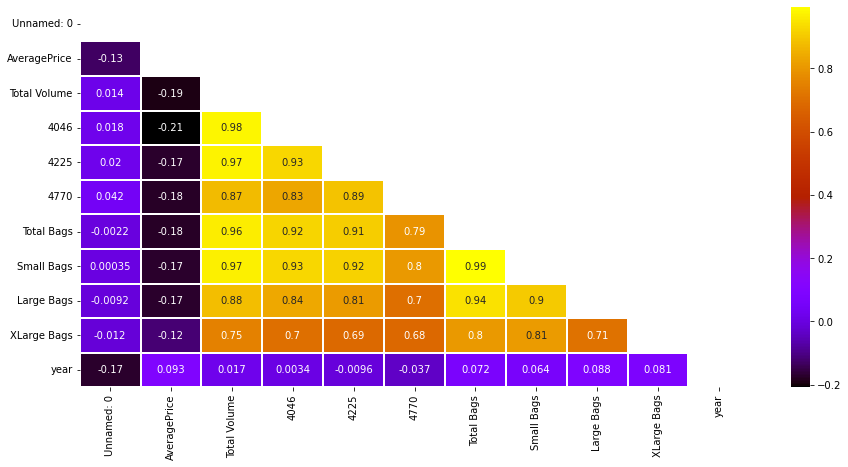

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr()),cmap='gnuplot',linewidths=0.1 )

In [11]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


We have converted the 'Date' column into datetime format.

In [14]:
# Removing the unnecessary library

df=df.drop(columns=['Unnamed: 0'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [16]:
df['region'].nunique()

54

# 1).First Task

Our first task is to find the region.

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [18]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(1), int64(1), object(1)
memory usage: 1.7+ MB


In [20]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [21]:
df.replace({'type':{'conventional':0,'organic':1}},inplace=True)

In [22]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


In [23]:
df['month']=pd.DatetimeIndex(df['Date']).month
df['date']=pd.DatetimeIndex(df['Date']).day

In [24]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  int64         
 11  year          18249 non-null  int64         
 12  region        18249 non-null  int32         
 13  month         18249 non-null  int64         
 14  date          18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

We have extracted the day,month and year from the 'Date' column, so now we will remove the column.

In [26]:
df=df.drop(columns=['Date'])

<AxesSubplot:>

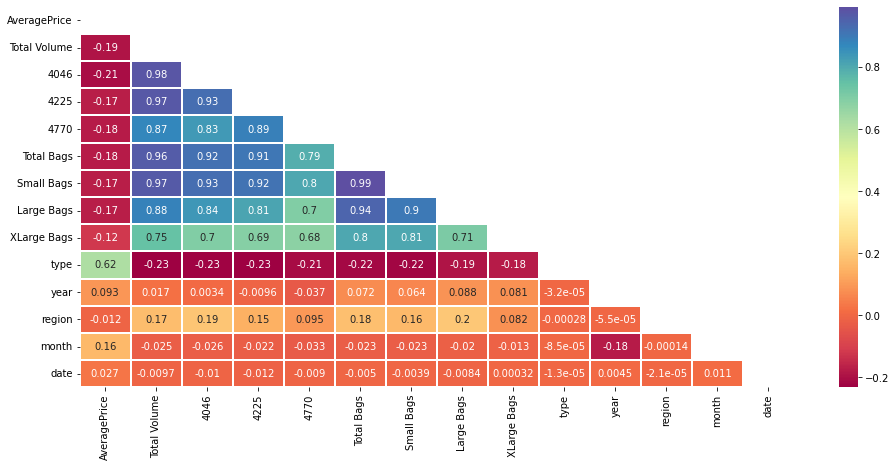

In [27]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,mask=np.triu(df.corr()),cmap='Spectral')

Columns '4046' and 'Total Volume' are highly correlated to each other
columns '4225' and 'Total Volume' are also highly correlated.
columns 'Small Bags' and 'Total Bags' Are very highly correlated to each other.
columns 'Small Bags' and 'Total Volume' are also highly correlated with each other.
There are various columns which are  highly correlated with other, so we will remove some of the columns.

In [28]:
dfn=df.copy()

In [29]:
dfn.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [30]:
dfn.corr()['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
date           -0.000021
year           -0.000055
month          -0.000144
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

In [31]:
dfn.drop(columns=['4225','Total Volume','date'],inplace=True)

<AxesSubplot:>

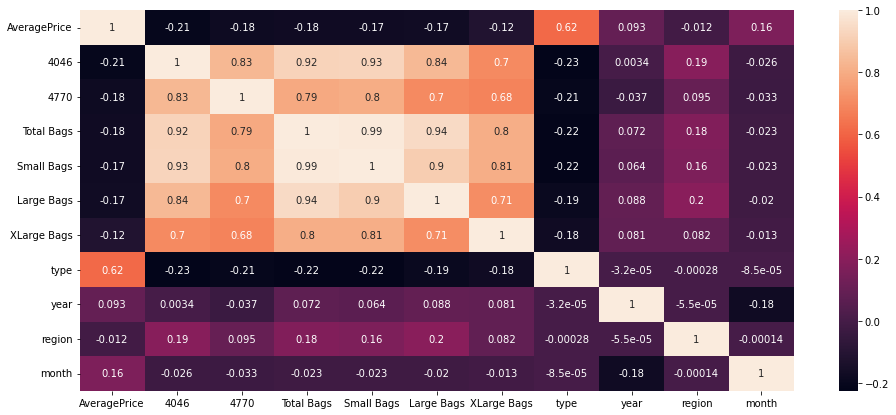

In [32]:
plt.figure(figsize=(16,7))
sns.heatmap(dfn.corr(),annot=True)

In [33]:
dfn.drop(columns=['Total Bags'],inplace=True)

<AxesSubplot:>

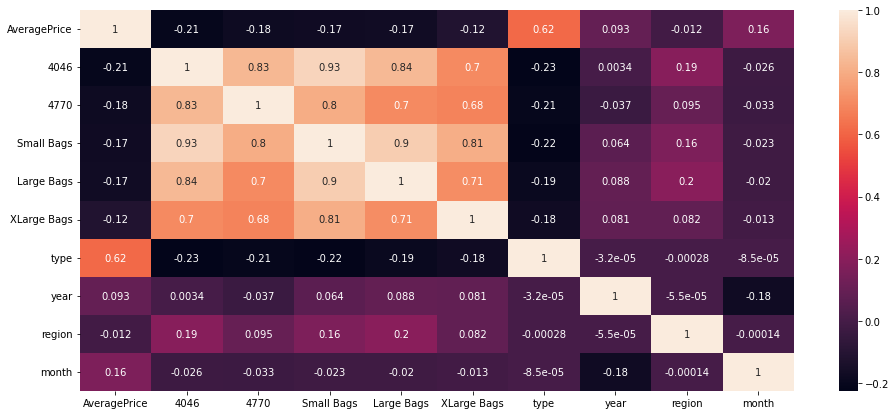

In [34]:
plt.figure(figsize=(16,7))
sns.heatmap(dfn.corr(),annot=True)

# Data Visualisation

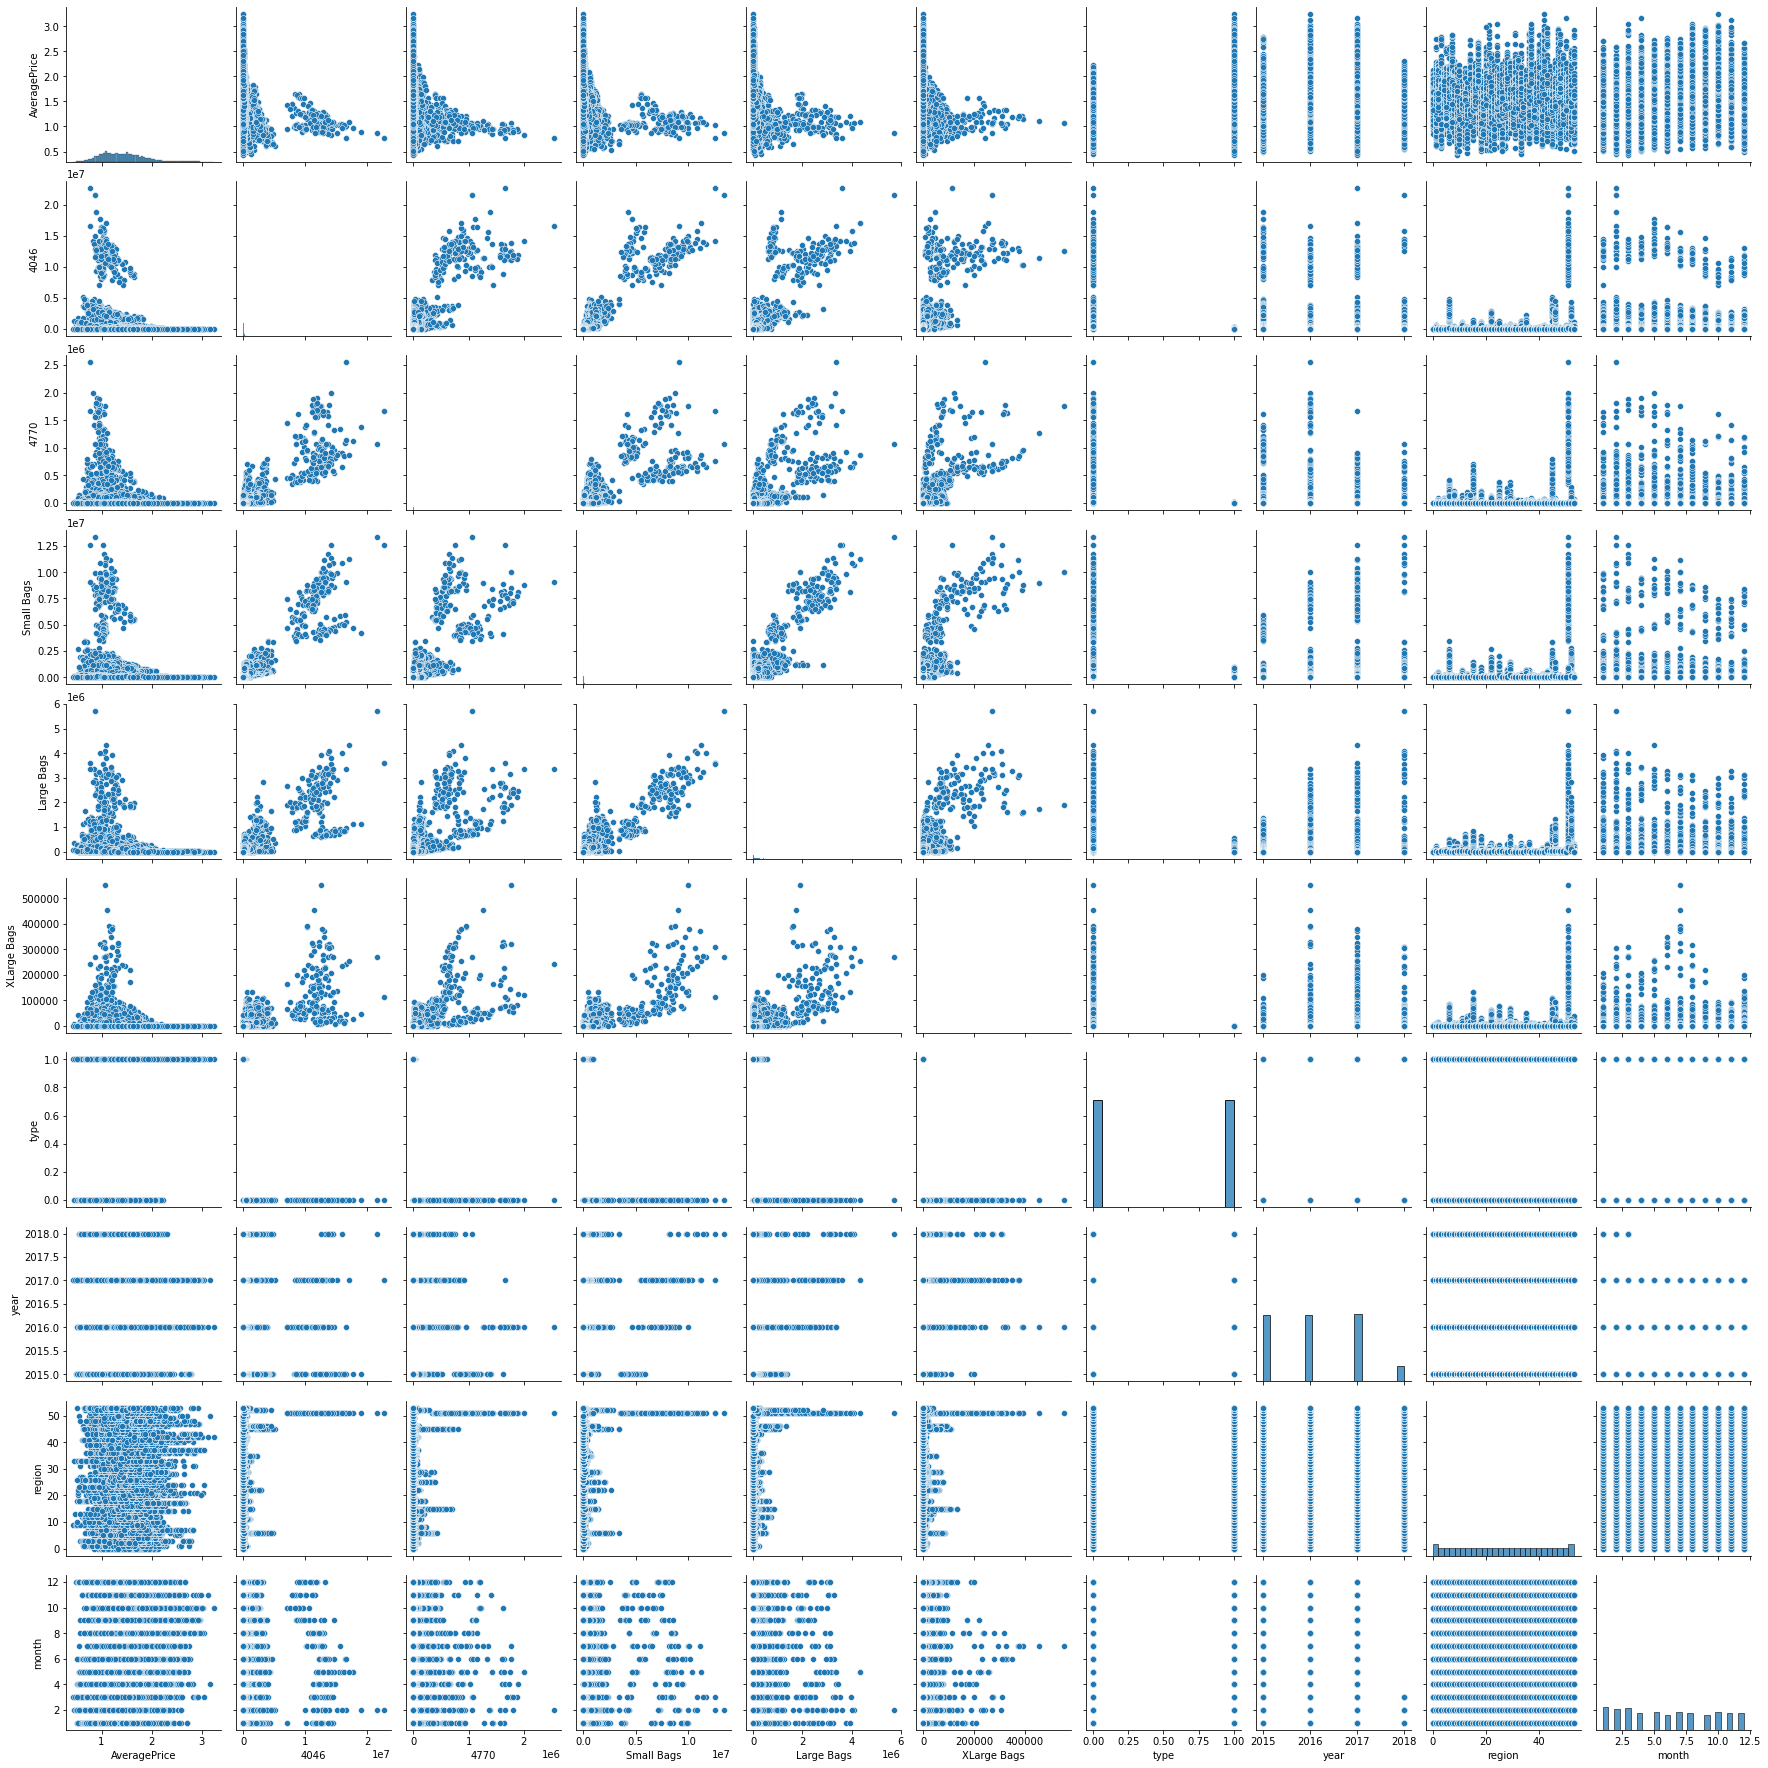

In [35]:
sns.pairplot(dfn)

In [35]:
dfn.corr()['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Small Bags      0.164702
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
month          -0.000144
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

<AxesSubplot:title={'center':'Region and Large Bags'}, xlabel='region', ylabel='Large Bags'>

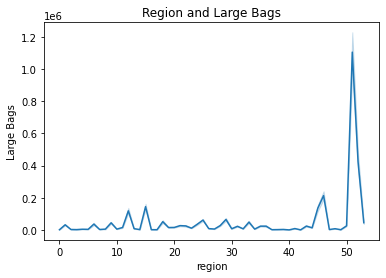

In [36]:
plt.title('Region and Large Bags')
sns.lineplot(x='region',y='Large Bags',data=dfn)

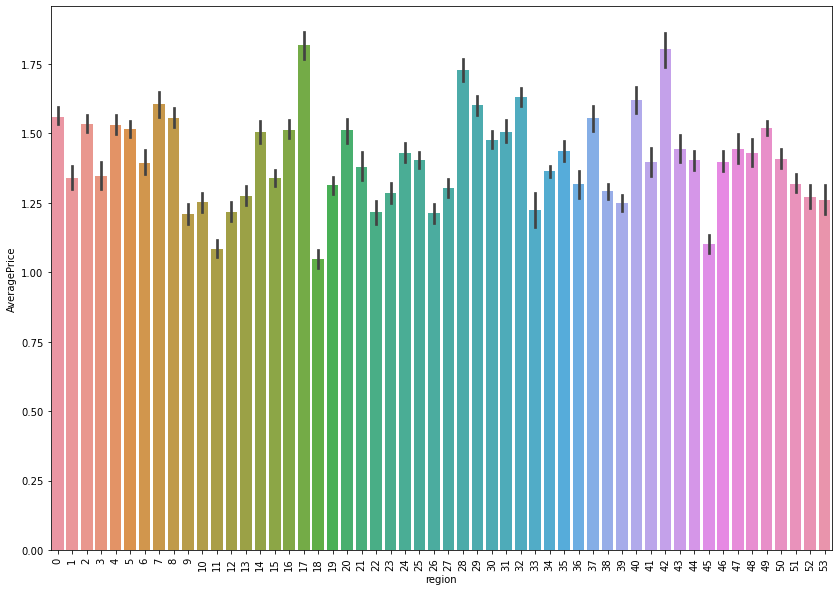

In [37]:
plt.figure(figsize=(14,10))
sns.barplot(x='region',y='AveragePrice',data=dfn)
plt.xticks(rotation=90)
plt.show()

In [38]:
dfn.skew()

AveragePrice     0.580303
4046             8.648220
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.106617
dtype: float64

There is definitely skewness present in the dataset.

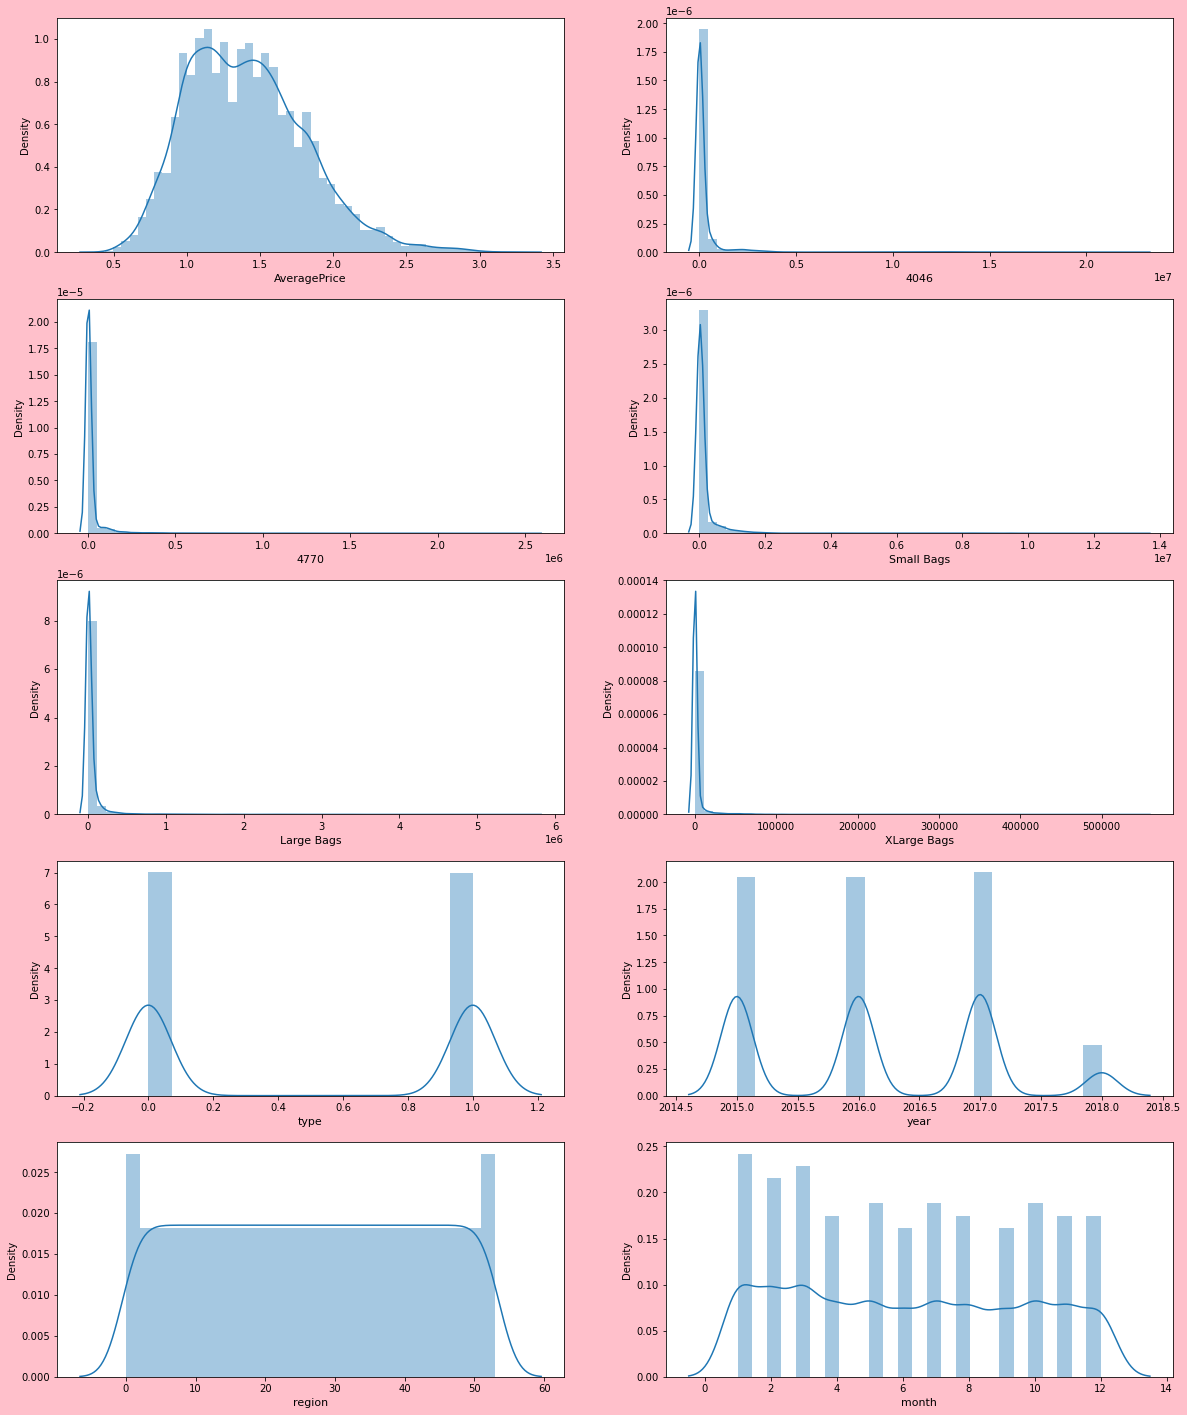

In [39]:
plt.figure(figsize=(20,25),facecolor='pink')
pn=1
for c in dfn:
    if pn<=10:
        ax=plt.subplot(5,2,pn)
        sns.distplot(dfn[c])
        plt.xlabel(c,fontsize=11)
    pn+=1

Let's look for the outliers.

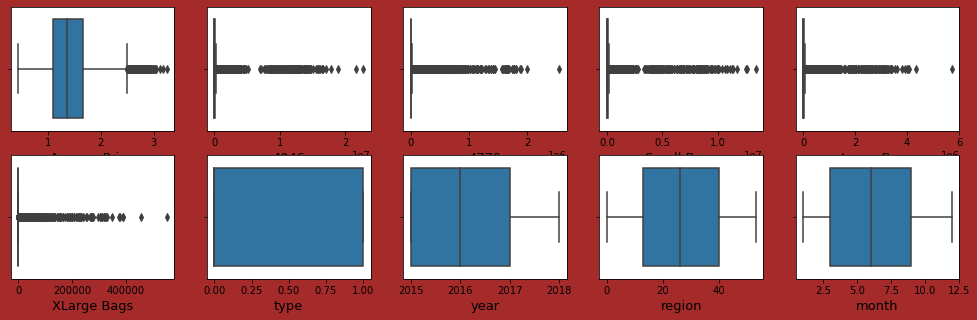

In [40]:
plt.figure(figsize=(17,5),facecolor='Brown')
p=1
for c in dfn:
    if p<=10:
        ax=plt.subplot(2,5,p)
        sns.boxplot(dfn[c])
        plt.xlabel(c,fontsize=13)
    p+=1

In [41]:
dfn.shape

(18249, 10)

There are outliers present in the dataset, so we will deal with them first.

In [42]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(dfn))
z.shape

(18249, 10)

In [43]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([1, 1, 5, ..., 0, 0, 0], dtype=int64))


In [44]:
df1=dfn[(z<3).all(axis=1)]
df1.shape

(17659, 10)

In [45]:
# data loss

(18249-17659)/18249*100

3.233053865965258

There is a data loss of 3.23% after removing the outliers.

In [46]:
df1.head()

,AveragePrice,4046,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,1036.74,48.16,8603.62,93.25,0.0,0,2015,0,12
1,1.35,674.28,58.33,9408.07,97.49,0.0,0,2015,0,12
2,0.93,794.70,130.50,8042.21,103.14,0.0,0,2015,0,12
3,1.08,1132.00,72.58,5677.40,133.76,0.0,0,2015,0,12
4,1.28,941.48,75.78,5986.26,197.69,0.0,0,2015,0,11


In [47]:
x=df1.drop(columns=['region'])
y=df1['region']

In [48]:
x.skew()

AveragePrice    0.378061
4046            4.910363
4770            5.112834
Small Bags      4.204049
Large Bags      5.044445
XLarge Bags     6.136602
type           -0.036818
year            0.230232
month           0.107500
dtype: float64

In [49]:
# There is skewness present in the dataset

In [50]:
x['4046']=np.log1p(df['4046'])
x['4770']=np.log1p(df['4770'])
x['Small Bags']=np.log1p(df['Small Bags'])
x['Large Bags']=np.log1p(df['Large Bags'])
x['XLarge Bags']=np.log1p(df['XLarge Bags'])

In [51]:
x.skew()

AveragePrice    0.378061
4046           -0.420932
4770            0.067791
Small Bags     -0.787622
Large Bags     -0.611103
XLarge Bags     1.215876
type           -0.036818
year            0.230232
month           0.107500
dtype: float64

Data looks better than before but we can see that there  is still skewness present in the 'XLarge Bags'. we will deal with this column later.

We will standardise the data

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)
scaledx

array([[-0.19501075, -0.58776557, -0.2467224 , ..., -1.01857673,
        -1.20989201,  1.64450079],
       [-0.14316466, -0.71991112, -0.19995884, ..., -1.01857673,
        -1.20989201,  1.64450079],
       [-1.23193246, -0.66944392, -0.00202349, ..., -1.01857673,
        -1.20989201,  1.64450079],
       ...,
       [ 1.20483356, -0.54490591,  0.42388998, ...,  0.98176207,
         1.98041454, -1.46273647],
       [ 1.36037182, -0.46864364,  0.42357249, ...,  0.98176207,
         1.98041454, -1.46273647],
       [ 0.55675749, -0.27215699,  0.13213483, ...,  0.98176207,
         1.98041454, -1.46273647]])

In [53]:
xx=pd.DataFrame(scaledx,columns=x.columns)

In [54]:
xx

,AveragePrice,4046,4770,Small Bags,Large Bags,XLarge Bags,type,year,month
0,-0.195011,-0.587766,-0.246722,-0.216469,-0.648736,-0.627523,-1.018577,-1.209892,1.644501
1,-0.143165,-0.719911,-0.199959,-0.180286,-0.637004,-0.627523,-1.018577,-1.209892,1.644501
2,-1.231932,-0.669444,-0.002023,-0.243785,-0.622132,-0.627523,-1.018577,-1.209892,1.644501
3,-0.843087,-0.560755,-0.146425,-0.384736,-0.553411,-0.627523,-1.018577,-1.209892,1.644501
4,-0.324626,-0.617378,-0.135838,-0.363293,-0.449899,-0.627523,-1.018577,-1.209892,1.362025
...,...,...,...,...,...,...,...,...,...
17654,0.582681,-0.378694,-1.215415,-0.047303,-0.242303,-0.627523,0.981762,1.980415,-1.180260
17655,0.790065,-0.544963,-1.215415,-0.200942,-0.318049,-0.627523,0.981762,1.980415,-1.462736
17656,1.204834,-0.544906,0.423890,-0.182715,-0.856044,-0.627523,0.981762,1.980415,-1.462736
17657,1.360372,-0.468644,0.423572,-0.119976,-0.812469,-0.627523,0.981762,1.980415,-1.462736


In [55]:
# will check the vif values

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
v=variance_inflation_factor

In [57]:
vif=pd.DataFrame()
vif['vif values']=[v(xx.values,i) for i in range(len(xx.columns))]
vif['features']=xx.columns

In [58]:
vif

,vif values,features
0,1.929944,AveragePrice
1,2.942075,4046
2,3.696700,4770
3,3.061031,Small Bags
4,1.759568,Large Bags
5,1.868176,XLarge Bags
6,3.695807,type
7,1.422028,year
8,1.115237,month


All the vif values are  under 10.

# Model Building

In [59]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       52, 53, 51])

In [60]:
# Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [61]:
maxAccu=0
maxRS=0
lg=LogisticRegression()
for i in range(10,40):
    x_train,x_test,y_train,y_test=train_test_split(xx,y,random_state=i,test_size=.25)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy score is', maxAccu , 'on random state', maxRS)

Best Accuracy score is 0.3954699886749717 on random state 17


17 is the best random state

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,y,random_state=17,test_size=.25)

In [65]:
# LOGISTIC REGRESSION

lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lpred=lr.predict(xtest)
print(accuracy_score(ytest,lpred))
print(confusion_matrix(ytest,lpred))
print(classification_report(ytest,lpred))

0.3954699886749717
[[44  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 49 ...  0  0  1]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  4  1 ...  0  0 13]]
              precision    recall  f1-score   support

           0       0.40      0.47      0.43        94
           1       0.25      0.44      0.31        87
           2       0.46      0.54      0.50        91
           3       0.16      0.11      0.13        76
           4       0.49      0.40      0.44        87
           5       0.37      0.38      0.37        86
           6       0.70      0.69      0.70        72
           7       0.47      0.56      0.51        86
           8       0.13      0.13      0.13        87
           9       0.43      0.61      0.50        84
          10       0.45      0.22      0.30        91
          11       0.59      0.52      0.55        88
          12       0.40      0.53      0.45        87
          13       0.31      0.36      0.33        81
          14  

In [66]:
# RANDOMFORST CLASSIFIER

rc=RandomForestClassifier()
rc.fit(xtrain,ytrain)
cpred=rc.predict(xtest)
print(accuracy_score(ytest,cpred))
print(confusion_matrix(ytest,cpred))
print(classification_report(ytest,cpred))

0.8559456398640997
[[83  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  0]
 [ 0  0 84 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  2 53  0]
 [ 0  0  2 ...  0  0 66]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        94
           1       0.70      0.78      0.74        87
           2       0.91      0.92      0.92        91
           3       0.80      0.83      0.81        76
           4       0.96      0.90      0.93        87
           5       0.89      0.72      0.79        86
           6       0.93      0.94      0.94        72
           7       0.88      0.87      0.88        86
           8       0.81      0.85      0.83        87
           9       0.87      0.87      0.87        84
          10       0.76      0.73      0.74        91
          11       0.86      0.92      0.89        88
          12       0.92      0.94      0.93        87
          13       0.74      0.79      0.76        81
          14  

In [67]:
# SVC

svc=SVC()
svc.fit(xtrain,ytrain)
spred=svc.predict(xtest)
print(accuracy_score(ytest,spred))
print(confusion_matrix(ytest,spred))
print(classification_report(ytest,spred))

0.6917327293318233
[[72  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  2]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  0  2 ...  0  0 43]]
              precision    recall  f1-score   support

           0       0.61      0.77      0.68        94
           1       0.46      0.53      0.49        87
           2       0.88      0.79      0.83        91
           3       0.68      0.68      0.68        76
           4       0.88      0.68      0.77        87
           5       0.74      0.50      0.60        86
           6       0.89      0.82      0.86        72
           7       0.79      0.74      0.77        86
           8       0.66      0.66      0.66        87
           9       0.55      0.71      0.62        84
          10       0.49      0.45      0.47        91
          11       0.71      0.73      0.72        88
          12       0.86      0.98      0.91        87
          13       0.39      0.67      0.50        81
          14  

In [68]:
# DECISIONTREE CLASSIFIER

dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dpred=dt.predict(xtest)
print(accuracy_score(ytest,dpred))
print(confusion_matrix(ytest,dpred))
print(classification_report(ytest,dpred))

0.7250283125707814
[[55  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  1]
 [ 0  0 79 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  4 47  0]
 [ 0  0  2 ...  0  0 53]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.63        94
           1       0.65      0.56      0.60        87
           2       0.86      0.87      0.86        91
           3       0.68      0.82      0.74        76
           4       0.81      0.82      0.81        87
           5       0.73      0.63      0.68        86
           6       0.82      0.81      0.81        72
           7       0.77      0.76      0.76        86
           8       0.71      0.80      0.76        87
           9       0.67      0.76      0.72        84
          10       0.67      0.52      0.58        91
          11       0.82      0.78      0.80        88
          12       0.75      0.83      0.79        87
          13       0.60      0.69      0.64        81
          14  

In [69]:
# KNEIGHBOR CLASSIFIER

k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
kpred=k.predict(xtest)
print(accuracy_score(ytest,kpred))
print(confusion_matrix(ytest,kpred))
print(classification_report(ytest,kpred))

0.7171007927519819
[[74  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  0  2 ...  0  0 58]]
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        94
           1       0.57      0.63      0.60        87
           2       0.77      0.85      0.81        91
           3       0.75      0.72      0.74        76
           4       0.84      0.75      0.79        87
           5       0.70      0.59      0.64        86
           6       0.96      0.90      0.93        72
           7       0.62      0.76      0.68        86
           8       0.78      0.82      0.80        87
           9       0.50      0.70      0.59        84
          10       0.51      0.54      0.52        91
          11       0.77      0.78      0.78        88
          12       0.90      0.83      0.86        87
          13       0.59      0.59      0.59        81
          14  

# CrossValidation Score

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
#for logistic regression

ls=cross_val_score(lr,xx,y)
print(ls)
print(ls.mean())

[0.27774632 0.26387316 0.33635334 0.35532276 0.25715095]
0.29808930639573833


In [72]:
# for random forest classifier

rs=cross_val_score(rc,xx,y)
print(rs)
print(rs.mean())

[0.60079275 0.70583239 0.63788222 0.52491506 0.35712263]
0.5653090103413448


In [73]:
# for svc

ss=cross_val_score(svc,xx,y)
print(ss)
print(ss.mean())

[0.48301246 0.50792752 0.45583239 0.4592299  0.29963183]
0.441126819469555


In [74]:
# for decisiontree classifier

ds=cross_val_score(dt,xx,y)
print(ds)
print(ds.mean())

[0.46970555 0.54105323 0.50934315 0.38391846 0.26479751]
0.43376357856782494


In [75]:
# for kneighbors classifier

ks=cross_val_score(k,xx,y)
print(ks)
print(ks.mean())


[0.35362401 0.36268403 0.33550396 0.35305776 0.25573492]
0.3321209362921453


In [76]:
# RandomForest Classifier is the best model of all. So the hyperparameter tuning will be done on it.

# HyperParameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25],
      'criterion':['gini','entropy']}

gcs=GridSearchCV(rc,param,cv=5,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'entropy', 'max_depth': 25, 'max_features': 'auto'}

In [79]:
fmodel1=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=25)

In [80]:
fmodel1.fit(xtrain,ytrain)
pred1=fmodel1.predict(xtest)
acc=accuracy_score(ytest,pred1)
print(acc*100)

85.95696489241223


  the randomforest classifier gives the accuracy of 85.95% after hyperparameter tuning.

# Saving the model

In [81]:
import joblib
joblib.dump(fmodel1,'avocado_region_prediction')

['avocado_region_prediction']

# Loading the model

In [82]:
m = joblib.load("avocado_region_prediction")
pp=m.predict(xtest)
print(pp)

[28  1  2 ... 38 45 45]


In [83]:
d=pd.DataFrame({'predicted values':pp,'actual values':ytest})

In [84]:
d

,predicted values,actual values
1483,28,28
2877,1,1
14868,2,2
9308,3,3
7073,27,27
...,...,...
9448,6,6
12356,8,8
13926,38,38
18148,45,45


# 2) Task (regression model)

In [85]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


<AxesSubplot:>

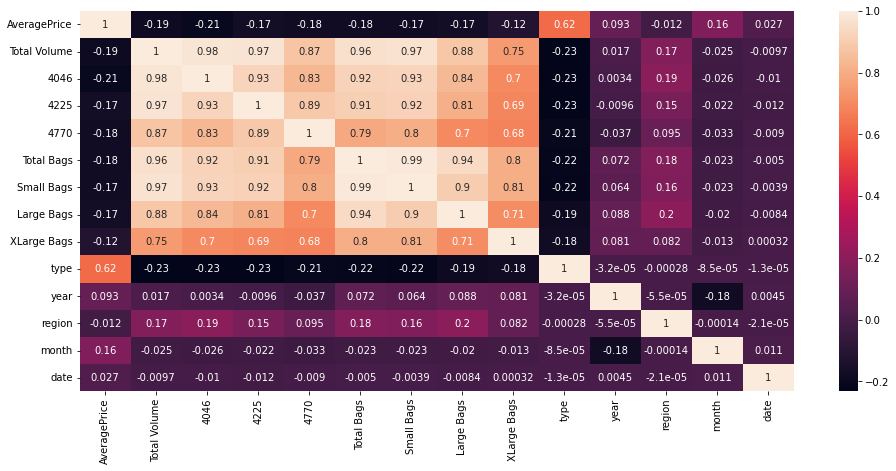

In [86]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True)

In [87]:
df.corr()['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.615845
month           0.162409
year            0.093197
date            0.027386
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

In [88]:
df=df.drop(columns=['Total Volume','4046','Total Bags','date'])

<AxesSubplot:>

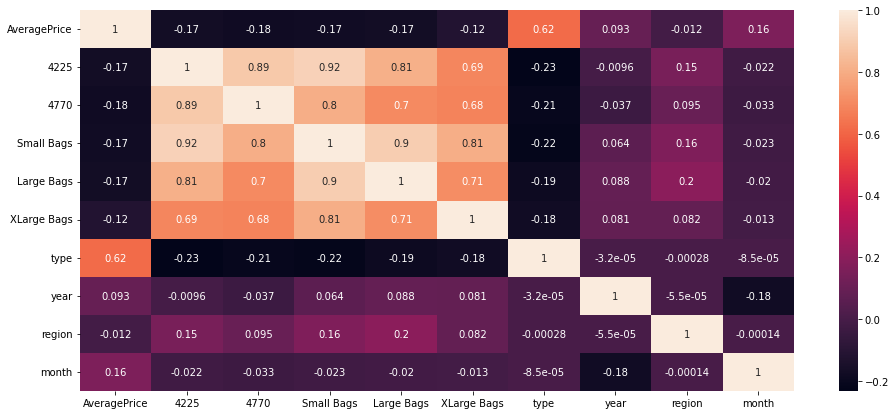

In [89]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True)

In [90]:
# Seperating features and label

x=df.drop(columns=['AveragePrice'])
y=df['AveragePrice']

In [91]:
x

,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,12
1,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,12
2,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,12
3,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,12
4,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...
18244,1529.20,0.00,13066.82,431.85,0.0,1,2018,53,2
18245,3431.50,0.00,8940.04,324.80,0.0,1,2018,53,1
18246,2452.79,727.94,9351.80,42.31,0.0,1,2018,53,1
18247,2981.04,727.01,10919.54,50.00,0.0,1,2018,53,1


In [92]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [93]:
x.skew()

4225            8.942466
4770           10.159396
Small Bags      9.540660
Large Bags      9.796455
XLarge Bags    13.139751
type            0.000329
year            0.215339
region          0.000030
month           0.106617
dtype: float64

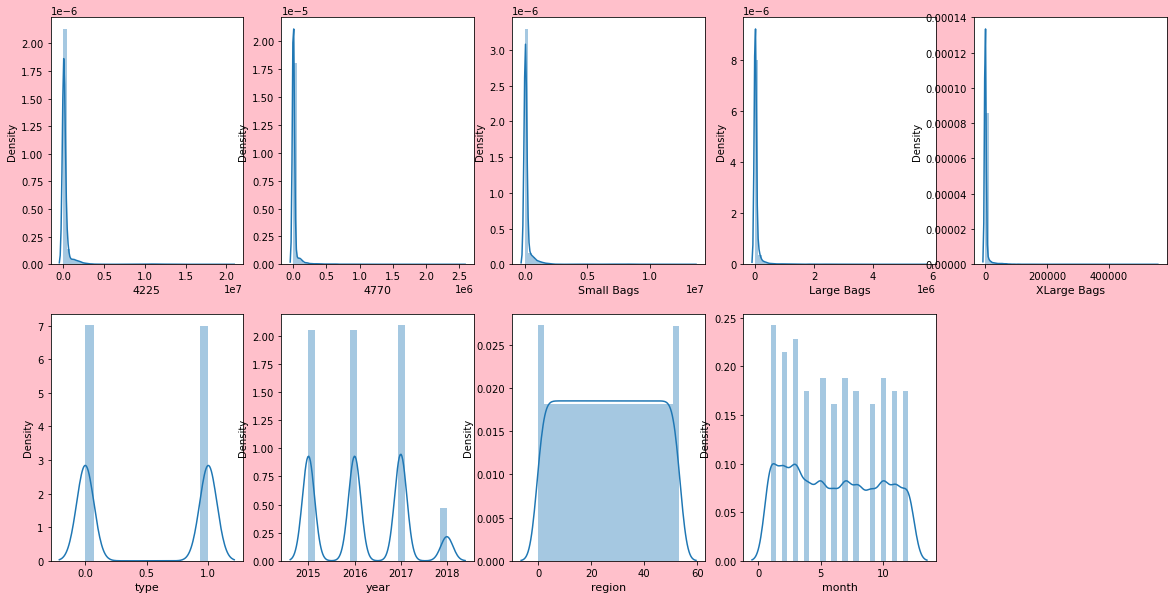

In [94]:
plt.figure(figsize=(20,10),facecolor='pink')
pn=1
for c in x:
    if pn<=9:
        ax=plt.subplot(2,5,pn)
        sns.distplot(x[c])
        plt.xlabel(c,fontsize=11)
    pn+=1

There is definitely skewness present in the dataset

Let's look for the outliers as well

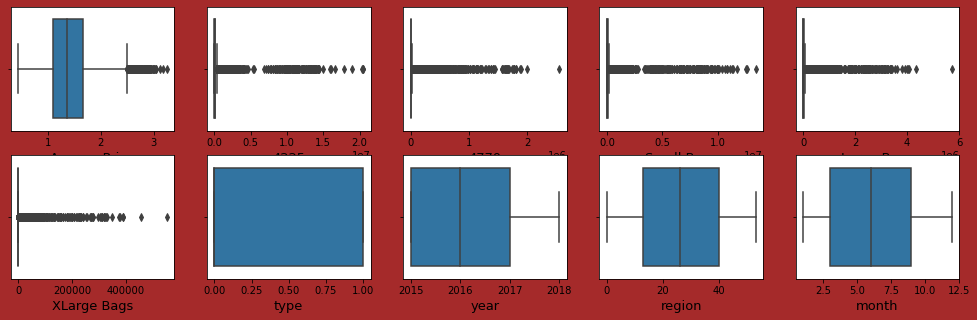

In [95]:
plt.figure(figsize=(17,5),facecolor='Brown')
p=1
for c in df:
    if p<=10:
        ax=plt.subplot(2,5,p)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=13)
    p+=1

In [96]:
# let's deal with the outliers first

In [97]:
df.shape

(18249, 10)

In [98]:

z=np.abs(zscore(df))
z.shape

(18249, 10)

In [99]:
threshold=3
print(np.where(z>3))

(array([  780,   781,   783, ..., 17304, 17402, 17428], dtype=int64), array([5, 5, 2, ..., 0, 0, 0], dtype=int64))


In [100]:
df2=df[(z<3).all(axis=1)]
df2.shape

(17657, 10)

In [101]:
# data loss

(18249-17657)/18249*100

3.244013370595649

3.24% of dataloss is acceptable.

In [102]:
x=df2.drop(columns=['AveragePrice'])
y=df2['AveragePrice']

In [103]:
x.skew()

4225           4.456086
4770           5.103115
Small Bags     4.212717
Large Bags     5.049910
XLarge Bags    6.129158
type          -0.037049
year           0.230065
region         0.012566
month          0.107782
dtype: float64

In [105]:
x['4225']=np.log1p(df['4225'])
x['4770']=np.log1p(df['4770'])
x['Small Bags']=np.log1p(df['Small Bags'])
x['Large Bags']=np.log1p(df['Large Bags'])
x['XLarge Bags']=np.log1p(df['XLarge Bags'])

In [106]:
x.skew()

4225          -0.603850
4770           0.068272
Small Bags    -0.788241
Large Bags    -0.611152
XLarge Bags    1.215157
type          -0.037049
year           0.230065
region         0.012566
month          0.107782
dtype: float64

Skewness is removed from the  dataset now

Now we will standardise the data

In [107]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)
scaledx

array([[ 0.43085143, -0.24668112, -0.2162773 , ..., -1.20979045,
        -1.69546025,  1.6449085 ],
       [ 0.358911  , -0.19992432, -0.18008829, ..., -1.20979045,
        -1.69546025,  1.6449085 ],
       [ 0.68252142, -0.00201759, -0.24359717, ..., -1.20979045,
        -1.69546025,  1.6449085 ],
       ...,
       [-0.69107   ,  0.4238343 , -0.1825171 , ...,  1.98083986,
         1.7467539 , -1.46265643],
       [-0.62050144,  0.42351685, -0.11976791, ...,  1.98083986,
         1.7467539 , -1.46265643],
       [-0.70561595,  0.13212133, -0.08196696, ...,  1.98083986,
         1.7467539 , -1.46265643]])

In [108]:
xx=pd.DataFrame(scaledx,columns=x.columns)
xx

,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0.430851,-0.246681,-0.216277,-0.648605,-0.62763,-1.018694,-1.20979,-1.695460,1.644908
1,0.358911,-0.199924,-0.180088,-0.636872,-0.62763,-1.018694,-1.20979,-1.695460,1.644908
2,0.682521,-0.002018,-0.243597,-0.621999,-0.62763,-1.018694,-1.20979,-1.695460,1.644908
3,0.531819,-0.146398,-0.384571,-0.553272,-0.62763,-1.018694,-1.20979,-1.695460,1.644908
4,0.352362,-0.135812,-0.363125,-0.449752,-0.62763,-1.018694,-1.20979,-1.695460,1.362403
...,...,...,...,...,...,...,...,...,...
17652,-0.861990,-1.215233,-0.047083,-0.242141,-0.62763,0.981649,1.98084,1.746754,-1.180151
17653,-0.569583,-1.215233,-0.200748,-0.317893,-0.62763,0.981649,1.98084,1.746754,-1.462656
17654,-0.691070,0.423834,-0.182517,-0.855929,-0.62763,0.981649,1.98084,1.746754,-1.462656
17655,-0.620501,0.423517,-0.119768,-0.812350,-0.62763,0.981649,1.98084,1.746754,-1.462656


# Vif values

In [109]:
vif=pd.DataFrame()
vif['vif values']=[v(xx.values,i) for i in range(len(xx.columns))]
vif['features']=xx.columns
vif

,vif values,features
0,3.258177,4225
1,3.927366,4770
2,2.836447,Small Bags
3,1.675568,Large Bags
4,1.867400,XLarge Bags
5,3.255539,type
6,1.322106,year
7,1.019385,region
8,1.046566,month


All the vif values are under 10

As we know that the column 'XLarge Bags' had skewness present in it. So, we will remove it.

In [111]:
xx=xx.drop(columns=['XLarge Bags'])

In [112]:
xx

,4225,4770,Small Bags,Large Bags,type,year,region,month
0,0.430851,-0.246681,-0.216277,-0.648605,-1.018694,-1.20979,-1.695460,1.644908
1,0.358911,-0.199924,-0.180088,-0.636872,-1.018694,-1.20979,-1.695460,1.644908
2,0.682521,-0.002018,-0.243597,-0.621999,-1.018694,-1.20979,-1.695460,1.644908
3,0.531819,-0.146398,-0.384571,-0.553272,-1.018694,-1.20979,-1.695460,1.644908
4,0.352362,-0.135812,-0.363125,-0.449752,-1.018694,-1.20979,-1.695460,1.362403
...,...,...,...,...,...,...,...,...
17652,-0.861990,-1.215233,-0.047083,-0.242141,0.981649,1.98084,1.746754,-1.180151
17653,-0.569583,-1.215233,-0.200748,-0.317893,0.981649,1.98084,1.746754,-1.462656
17654,-0.691070,0.423834,-0.182517,-0.855929,0.981649,1.98084,1.746754,-1.462656
17655,-0.620501,0.423517,-0.119768,-0.812350,0.981649,1.98084,1.746754,-1.462656


# Model Building

In [115]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17657, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [117]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(xx,y,test_size = .25, random_state=i)
    lg = LinearRegression()
    lg.fit(xtrain,ytrain)
    pred = lg.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.5156018657160739 on Random State: 28


In [118]:
# best random state is 28

In [119]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,y,test_size=0.25,random_state=28)

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [121]:
# LINEAR REGRESSION

from sklearn.metrics import mean_squared_error, mean_absolute_error
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lpred = lr.predict(xtest)
print(r2_score(ytest, lpred))
print("Mean absolute error: ", mean_absolute_error(ytest,lpred))
print("Mean squared error: ", mean_squared_error(ytest,lpred))

0.5156018657160739
Mean absolute error:  0.21125183744202491
Mean squared error:  0.07166253342131995


In [122]:
# RANDOMFOREST REGRESSOR

r= RandomForestRegressor()
r.fit(xtrain, ytrain)
rpred = r.predict(xtest)
print(r2_score(ytest, rpred))
print("Mean absolute error: ", mean_absolute_error(ytest,rpred))
print("Mean squared error: ", mean_squared_error(ytest,rpred))

0.8730459673957438
Mean absolute error:  0.09645898074745185
Mean squared error:  0.018781756081540195


In [123]:
# DECISIONTREE REGRESSOR

dt= DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
dpred = dt.predict(xtest)
print(r2_score(ytest, dpred))
print("Mean absolute error: ", mean_absolute_error(ytest,dpred))
print("Mean squared error: ", mean_squared_error(ytest,dpred))

0.7383287769289277
Mean absolute error:  0.12806115515288785
Mean squared error:  0.03871200453001133


In [124]:
# ADABOOST REGRESSOR
a=AdaBoostRegressor()
a.fit(xtrain,ytrain)
apred=a.predict(xtest)
print(r2_score(ytest, apred))
print("Mean absolute error: ", mean_absolute_error(ytest,apred))
print("Mean squared error: ", mean_squared_error(ytest,apred))

0.5508562171392377
Mean absolute error:  0.20688560406747303
Mean squared error:  0.06644695565935319


In [125]:
k=KNeighborsRegressor()
k.fit(xtrain,ytrain)
kpred=k.predict(xtest)
print(r2_score(ytest, kpred))
print("Mean absolute error: ", mean_absolute_error(ytest,kpred))
print("Mean squared error: ", mean_squared_error(ytest,kpred))

0.8502462695041828
Mean absolute error:  0.10460475651189127
Mean squared error:  0.02215477508493771


In [126]:
s=SVR()
s.fit(xtrain,ytrain)
spred=s.predict(xtest)
print(r2_score(ytest, spred))
print("Mean absolute error: ", mean_absolute_error(ytest,spred))
print("Mean squared error: ", mean_squared_error(ytest,spred))

0.7524346327037431
Mean absolute error:  0.14436557879727382
Mean squared error:  0.03662516461599441


# CrossValidation Score

In [127]:
# Linear Regression

s=cross_val_score(lr,xx,y)
print(s)
print(s.mean())

[-0.44147984  0.10565866  0.41094176  0.15985278  0.17975466]
0.08294560428287448


In [128]:
# RandomForest Regressor

s=cross_val_score(r,xx,y)
print(s)
print(s.mean())

[-0.47431833  0.37618971  0.43709331  0.07106742  0.06067432]
0.09414128859271365


In [130]:
# DecisionTree Regressor

s=cross_val_score(dt,xx,y)
print(s)
print(s.mean())

[-1.14793315  0.09007476  0.02424755 -0.6828108  -0.31877271]
-0.4070388685808359


In [132]:
# Adaboost Regressor

s=cross_val_score(a,xx,y)
print(s)
print(s.mean())

[-1.12689085  0.27099009  0.52088514  0.06541699  0.14772302]
-0.02437512346306616


In [134]:
# Kneighbor Regressor

s=cross_val_score(k,xx,y)
print(s)
print(s.mean())

[-0.62480937  0.17598915  0.17375325 -0.02058181 -0.03508818]
-0.06614739067502107


In [135]:
# as per the observation, randomforest Regressor is our best model

# Hyperparameter tuning

In [136]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[4,5,6,7,8],
      'criterion':['mse','mae']}

gcs=GridSearchCV(r,param,cv=7,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto'}

In [137]:
fmodel2=RandomForestRegressor(max_features='auto',criterion='mse',max_depth=4)

In [138]:
fmodel2.fit(xtrain,ytrain)

RandomForestRegressor(criterion='mse', max_depth=4)

In [139]:
pred2=fmodel2.predict(xtest)
acc=r2_score(ytest,pred2)
print(acc*100)

55.11499613245311


In [140]:
# the Randomforest Regressor gives the accuracy of 55.11%

In [142]:
import joblib
joblib.dump(fmodel2,'avocado_avg_price')

['avocado_avg_price']

In [143]:
#load the model

In [144]:
m = joblib.load("avocado_avg_price")
print(m.predict(xtest))

[1.11442954 1.60224069 1.18639043 ... 1.12236466 1.22021824 0.97737502]


In [146]:
d=pd.DataFrame({'predicted values':pred2,'actual values':ytest})

In [147]:
d

,predicted values,actual values
1880,1.114430,1.06
15330,1.602241,1.63
2507,1.186390,1.15
5549,0.970428,0.79
10979,1.458996,1.85
...,...,...
3229,1.148771,1.13
15536,1.700458,1.29
3820,1.122365,1.12
7513,1.220218,1.29


# The accuracy is not up to the mark, so let's try different methods to increase the accuracy

In [149]:
df

,AveragePrice,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,12
1,1.35,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,12
2,0.93,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,12
3,1.08,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,12
4,1.28,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,1529.20,0.00,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,3431.50,0.00,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,2452.79,727.94,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,2981.04,727.01,10919.54,50.00,0.0,1,2018,53,1


In [150]:
xx=df2.drop(columns=['AveragePrice'])

In [151]:
yy=df2['AveragePrice']

In [152]:
xx

,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,12
1,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,12
2,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,12
3,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,12
4,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...
18244,1529.20,0.00,13066.82,431.85,0.0,1,2018,53,2
18245,3431.50,0.00,8940.04,324.80,0.0,1,2018,53,1
18246,2452.79,727.94,9351.80,42.31,0.0,1,2018,53,1
18247,2981.04,727.01,10919.54,50.00,0.0,1,2018,53,1


In [153]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledx = sc.fit_transform(xx)
scaledx

array([[-0.27878735, -0.32258539, -0.40124767, ..., -1.20979045,
        -1.69546025,  1.6449085 ],
       [-0.30327018, -0.32229103, -0.39774985, ..., -1.20979045,
        -1.69546025,  1.6449085 ],
       [-0.1423694 , -0.32020211, -0.40368874, ..., -1.20979045,
        -1.69546025,  1.6449085 ],
       ...,
       [-0.40848911, -0.30290962, -0.39799451, ...,  1.98083986,
         1.7467539 , -1.46265643],
       [-0.40717157, -0.30293653, -0.39117783, ...,  1.98083986,
         1.7467539 , -1.46265643],
       [-0.4087302 , -0.31748048, -0.38653145, ...,  1.98083986,
         1.7467539 , -1.46265643]])

In [160]:
xx=pd.DataFrame(scaledx,columns=x.columns)

In [161]:
xx

,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,-0.278787,-0.322585,-0.401248,-0.380144,-0.259275,-1.018694,-1.20979,-1.695460,1.644908
1,-0.303270,-0.322291,-0.397750,-0.380086,-0.259275,-1.018694,-1.20979,-1.695460,1.644908
2,-0.142369,-0.320202,-0.403689,-0.380009,-0.259275,-1.018694,-1.20979,-1.695460,1.644908
3,-0.235086,-0.321879,-0.413971,-0.379590,-0.259275,-1.018694,-1.20979,-1.695460,1.644908
4,-0.305267,-0.321786,-0.412628,-0.378714,-0.259275,-1.018694,-1.20979,-1.695460,1.362403
...,...,...,...,...,...,...,...,...,...
17652,-0.410793,-0.323979,-0.381841,-0.375508,-0.259275,0.981649,1.98084,1.746754,-1.180151
17653,-0.406048,-0.323979,-0.399785,-0.376974,-0.259275,0.981649,1.98084,1.746754,-1.462656
17654,-0.408489,-0.302910,-0.397995,-0.380842,-0.259275,0.981649,1.98084,1.746754,-1.462656
17655,-0.407172,-0.302937,-0.391178,-0.380737,-0.259275,0.981649,1.98084,1.746754,-1.462656


In [162]:
from sklearn.feature_selection import SelectKBest, f_classif


In [163]:
bf = SelectKBest(score_func = f_classif, k = 'all')
fit = bf.fit(xx,yy)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xx.columns)


dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

       Feature      Score
5         type  59.009671
2   Small Bags   9.216947
3   Large Bags   9.189747
1         4770   7.732347
0         4225   6.960706
6         year   3.562300
8        month   3.106796
4  XLarge Bags   3.083352
7       region   1.162066


In [164]:
# we will remove colum 'region' as from the above observation.

In [166]:
xx.drop(columns=['region'],inplace=True)

In [167]:
xx

,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,month
0,-0.278787,-0.322585,-0.401248,-0.380144,-0.259275,-1.018694,-1.20979,1.644908
1,-0.303270,-0.322291,-0.397750,-0.380086,-0.259275,-1.018694,-1.20979,1.644908
2,-0.142369,-0.320202,-0.403689,-0.380009,-0.259275,-1.018694,-1.20979,1.644908
3,-0.235086,-0.321879,-0.413971,-0.379590,-0.259275,-1.018694,-1.20979,1.644908
4,-0.305267,-0.321786,-0.412628,-0.378714,-0.259275,-1.018694,-1.20979,1.362403
...,...,...,...,...,...,...,...,...
17652,-0.410793,-0.323979,-0.381841,-0.375508,-0.259275,0.981649,1.98084,-1.180151
17653,-0.406048,-0.323979,-0.399785,-0.376974,-0.259275,0.981649,1.98084,-1.462656
17654,-0.408489,-0.302910,-0.397995,-0.380842,-0.259275,0.981649,1.98084,-1.462656
17655,-0.407172,-0.302937,-0.391178,-0.380737,-0.259275,0.981649,1.98084,-1.462656


In [168]:
yy

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17657, dtype: float64

In [169]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(xx,yy,test_size = .25, random_state=i)
    lg = LinearRegression()
    lg.fit(xtrain,ytrain)
    pred = lg.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.4545747749651693 on Random State: 29


In [170]:
# best random state is 29

In [171]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,yy,test_size=0.25,random_state=29)

In [172]:
# LINEAR REGRESSION

from sklearn.metrics import mean_squared_error, mean_absolute_error
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lpred = lr.predict(xtest)
print(r2_score(ytest, lpred))
print("Mean absolute error: ", mean_absolute_error(ytest,lpred))
print("Mean squared error: ", mean_squared_error(ytest,lpred))

0.4545747749651693
Mean absolute error:  0.22764507555787294
Mean squared error:  0.08350836008568585


In [173]:
# RANDOMFOREST REGRESSOR

r= RandomForestRegressor()
r.fit(xtrain, ytrain)
rpred = r.predict(xtest)
print(r2_score(ytest, rpred))
print("Mean absolute error: ", mean_absolute_error(ytest,rpred))
print("Mean squared error: ", mean_squared_error(ytest,rpred))

0.8279640057109781
Mean absolute error:  0.11497062287655718
Mean squared error:  0.026339896101925254


In [174]:
# DECISIONTREE REGRESSOR

dt= DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
dpred = dt.predict(xtest)
print(r2_score(ytest, dpred))
print("Mean absolute error: ", mean_absolute_error(ytest,dpred))
print("Mean squared error: ", mean_squared_error(ytest,dpred))

0.6538404574647734
Mean absolute error:  0.15086296715741787
Mean squared error:  0.05299941109852774


In [175]:
# ADABOOST REGRESSOR
a=AdaBoostRegressor()
a.fit(xtrain,ytrain)
apred=a.predict(xtest)
print(r2_score(ytest, apred))
print("Mean absolute error: ", mean_absolute_error(ytest,apred))
print("Mean squared error: ", mean_squared_error(ytest,apred))

0.5434695718053305
Mean absolute error:  0.21325847461041775
Mean squared error:  0.06989795417936202


In [176]:
k=KNeighborsRegressor()
k.fit(xtrain,ytrain)
kpred=k.predict(xtest)
print(r2_score(ytest, kpred))
print("Mean absolute error: ", mean_absolute_error(ytest,kpred))
print("Mean squared error: ", mean_squared_error(ytest,kpred))

0.7406072595279614
Mean absolute error:  0.1445318233295583
Mean squared error:  0.03971481585503964


In [177]:
s=SVR()
s.fit(xtrain,ytrain)
spred=s.predict(xtest)
print(r2_score(ytest, spred))
print("Mean absolute error: ", mean_absolute_error(ytest,spred))
print("Mean squared error: ", mean_squared_error(ytest,spred))

0.6237731227018926
Mean absolute error:  0.17914875482386927
Mean squared error:  0.05760292722309856


# CrossValidation Score

In [179]:
# Linear Regression

s=cross_val_score(lr,xx,yy)
print(s)
print(s.mean())

[-0.41633678  0.14864175  0.33221163 -0.02029229  0.05875156]
0.020595174705692786


In [180]:
# RandomForest Regressor

s=cross_val_score(r,xx,yy)
print(s)
print(s.mean())

[-0.63405739  0.36595453  0.51158639  0.18632502 -0.02848799]
0.0802641135565699


In [181]:
# DecisionTree Regressor

s=cross_val_score(dt,xx,y)
print(s)
print(s.mean())

[-1.35554975  0.01191309  0.16355261 -0.40128361 -0.50519483]
-0.41731249799742065


In [182]:
# Adaboost Regressor

s=cross_val_score(a,xx,y)
print(s)
print(s.mean())

[-1.0639582   0.30744828  0.51936035 -0.0137574   0.15473925]
-0.01923354244373112


In [183]:
# Kneighbor Regressor

s=cross_val_score(k,xx,y)
print(s)
print(s.mean())

[-0.72043713  0.36022907  0.45946476 -0.22862525 -0.33150046]
-0.09217380170177665


In [184]:
# as per the observation, randomforest Regressor is our best model

# Hyperparameter Tuning

In [185]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[10,20,30,40],
      'criterion':['mse','mae']}

gcs=GridSearchCV(r,param,cv=7,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto'}

In [186]:
fmodel3=RandomForestRegressor(max_features='auto',criterion='mse',max_depth=10) 

In [187]:
fmodel3.fit(xtrain,ytrain)

RandomForestRegressor(criterion='mse', max_depth=10)

In [188]:
pred3=fmodel3.predict(xtest)
acc=r2_score(ytest,pred3)
print(acc*100)

77.41234177367605


###### now the model gives the accuracy of 77.41%

# saving the model

In [190]:
import joblib
joblib.dump(fmodel3,'f_avocado_avg_price')

['f_avocado_avg_price']

# Loading the model

In [191]:
f = joblib.load("f_avocado_avg_price")
print(f.predict(xtest))

[1.29490199 1.24632393 1.44344845 ... 1.7688948  1.67036684 1.59510636]


In [192]:
#predicted values
print('predicted values:-',pred3)
print('actual values:-',ytest)

predicted values:- [1.29490199 1.24632393 1.44344845 ... 1.7688948  1.67036684 1.59510636]
actual values:- 4013     1.23
17070    1.25
15942    1.25
547      0.99
4889     1.04
         ... 
7183     1.74
4233     1.20
9979     1.96
11942    1.86
14722    1.10
Name: AveragePrice, Length: 4415, dtype: float64


In [193]:
dn=pd.DataFrame({'predicted values':pred3,'actual values':ytest})

In [194]:
dn

,predicted values,actual values
4013,1.294902,1.23
17070,1.246324,1.25
15942,1.443448,1.25
547,1.060756,0.99
4889,1.273293,1.04
...,...,...
7183,1.588398,1.74
4233,1.144424,1.20
9979,1.768895,1.96
11942,1.670367,1.86


# Best fit line

Text(0.5, 1.0, 'Best Fit Line')

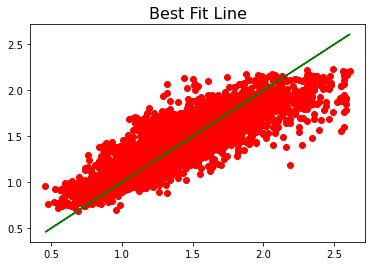

In [195]:
plt.scatter(x=ytest,y=pred3, color='red')
plt.plot(ytest,ytest,color='green')
plt.title('Best Fit Line',fontsize=16)